# Project: Investigate a Dataset - [No Show Appointment]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. We want to know what affects the patient not showing up on his appointment.

### Questions :
* Is no show up related to specific gender ?
* Does no show up correlates strongly with other variables ?
* Does scholarship affect the patient decision to attend the appointment?
* Does being handcapped affect the patient decision to attend the appointment?
* Does day of appointment affects showing up ?

In [3]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 3.2MB/s eta 0:00:01   46% |██████████████▊                 | 4.8MB 28.7MB/s eta 0:00:01    59% |███████████████████             | 6.2MB 29.7MB/s eta 0:00:01    85% |███████████████████████████▍    | 8.9MB 27.9MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 3.1MB/s eta 0:00:01   39% |████████████▋                   | 5.3MB 25.4MB/s eta 0:00:01    58% |██████████████████▉             | 7.9MB 28.1MB/s eta 0:00:01    87% |████████████████████████████    | 11.7MB 26.9MB/s eta 0:00:01    96% |███████████████████████████████ | 13.0MB 26.0MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: pandas 0.23.3
    Uninstalling pandas-0.23.3:
      Successfully uninstalled pandas-0.23.3


<a id='wrangling'></a>
## Data Wrangling


In [4]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
df =pd.read_csv('./Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [29]:
df.shape

(110527, 14)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [18]:
sum(df.duplicated())

0

In [20]:
df.isnull().sum().any()

False

In [22]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


**Impressions till now:**

* There is no missing values
* There is no duplicated rows
* We need to rename the columns to lower case for easier use
* We should drop records with age < 0
* Convert Scheduled and Appointment columns to date time and for easier just keep the date without time.
* Column PatientId type will be changed from float to int.
* Change no show column to reverse to avoid any misunderstanding

<a id='cleaning'></a>
## Data Cleaning

In [26]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


In [6]:
#Rename the columns for easier use
df.columns=df.columns.str.lower()

In [7]:
#drop records with age < 0
df=df[df["age"]>0.0]

In [8]:
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [9]:
#Convert Scheduled and Appointment columns to date time and for easier just keep the date without time.

cols = ["appointmentday", "scheduledday"]
for col in cols:
    df[col] = df[col].apply(lambda x: x.split("T")[0])
 

In [10]:
for col in cols:
    df[col] = pd.to_datetime(df[col])
    
df.head(1)        

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [11]:
#Column PatientId type will be changed from float to int.
df['patientid'] = df['patientid'].astype('int')

In [12]:
#Reverse no show column to avoid misunderstanding

df.rename(columns={"no-show":"show"},inplace=True)
df.show = df.show.map({'Yes':0,'No':1})
df.show.astype(int);

In [13]:
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106987 entries, 0 to 110526
Data columns (total 14 columns):
patientid         106987 non-null int64
appointmentid     106987 non-null int64
gender            106987 non-null object
scheduledday      106987 non-null datetime64[ns]
appointmentday    106987 non-null datetime64[ns]
age               106987 non-null int64
neighbourhood     106987 non-null object
scholarship       106987 non-null int64
hipertension      106987 non-null int64
diabetes          106987 non-null int64
alcoholism        106987 non-null int64
handcap           106987 non-null int64
sms_received      106987 non-null int64
show              106987 non-null int64
dtypes: datetime64[ns](2), int64(10), object(2)
memory usage: 12.2+ MB


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 : Is no show up related to specific gender ?

In [15]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

summary=df.groupby('show').mean().loc[:,'scholarship':]
summary

,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
show,,,,,,
0,0.118589,0.173985,0.065959,0.031227,0.020895,0.441328
1,0.096569,0.211343,0.076348,0.031451,0.023503,0.293258


In [16]:
#Get the number for each gender that showed 
show_gen = df.groupby('gender').show.sum()
show_gen

gender
F    55843
M    29464
Name: show, dtype: int64

In [17]:
Total_gen= df.groupby('gender').patientid.count()
Total_gen

gender
F    70118
M    36869
Name: patientid, dtype: int64

In [18]:
show_gen['F']

55843

In [19]:
prop_female = show_gen['F']/(Total_gen['F']) *100
prop_male   = show_gen['M']/(Total_gen['M']) *100
prop_female, prop_male

(79.64146153626743, 79.91537606118962)

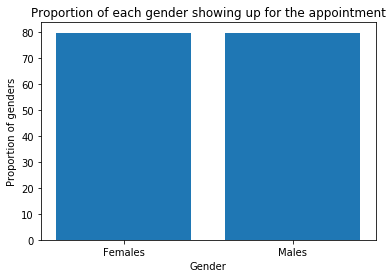

In [20]:
plt.bar(["Females", "Males"], [prop_female, prop_male])
plt.title("Proportion of each gender showing up for the appointment")
plt.xlabel("Gender")
plt.ylabel("Proportion of genders");

The proprtion for males and females showing up for the appointment is almost equal 

### Research Question 2  :Does no show up correlates strongly with other variables ?

In [21]:
df.corr()

,patientid,appointmentid,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show
patientid,1.000000,0.004189,-0.002970,-0.002172,-0.006155,0.001873,0.011361,-0.007989,-0.008468,0.001083
appointmentid,0.004189,1.000000,-0.023401,0.022379,0.012092,0.022505,0.033159,0.013993,-0.254682,0.161578
age,-0.002970,-0.023401,1.000000,-0.112699,0.502091,0.290631,0.090391,0.074073,0.005251,0.067025
scholarship,-0.002172,0.022379,-0.112699,1.000000,-0.024530,-0.027622,0.033527,-0.009890,-0.000010,-0.029370
hipertension,-0.006155,0.012092,0.502091,-0.024530,1.000000,0.430827,0.085459,0.078209,-0.008805,0.037280
diabetes,0.001873,0.022505,0.290631,-0.027622,0.430827,1.000000,0.016874,0.056377,-0.016136,0.015928
alcoholism,0.011361,0.033159,0.090391,0.033527,0.085459,0.016874,1.000000,0.003855,-0.027403,0.000517
handcap,-0.007989,0.013993,0.074073,-0.009890,0.078209,0.056377,0.003855,1.000000,-0.025155,0.006389
sms_received,-0.008468,-0.254682,0.005251,-0.000010,-0.008805,-0.016136,-0.027403,-0.025155,1.000000,-0.127253
show,0.001083,0.161578,0.067025,-0.029370,0.037280,0.015928,0.000517,0.006389,-0.127253,1.000000


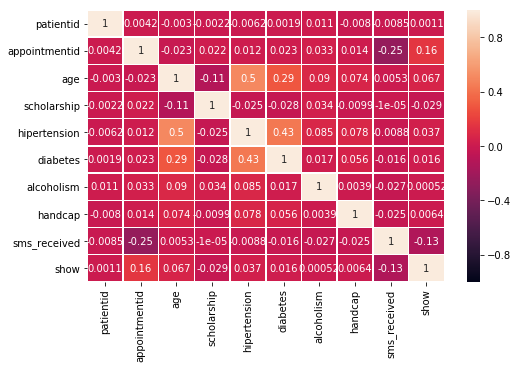

In [22]:
plt.figure(figsize = (8, 5))
sns.heatmap(df.corr() ,annot=True , linewidths=.5 , vmin = -1, vmax = 1 )

There is no strong correlation between the no show up and any other variable.
On the other hand, there is positive correlation between diabetes and hypertension

### Research Question 3 : Does scholarship affect the patient decision to attend the appointment?

In [24]:
df_schol = df[df["scholarship"] == 1]
df_schol.head(3)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show
12,566654781423437,5634718,F,2016-04-28,2016-04-29,22,NOVA PALESTINA,1,0,0,0,0,0,1
17,14794966191172,5633460,F,2016-04-28,2016-04-29,40,CONQUISTA,1,0,0,0,0,0,0
18,17135378245248,5621836,F,2016-04-26,2016-04-29,30,NOVA PALESTINA,1,0,0,0,0,1,1


In [25]:
def plot_pie(df_name ,title) :
    plt.pie(df_name["show"].value_counts(), labels = ["Attended", "Didn't Attend"] , autopct='%1.0f%%');
    plt.title(title);
    

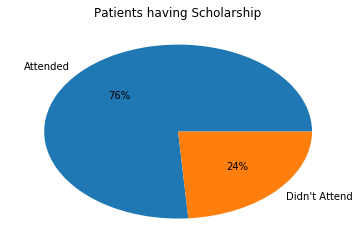

In [26]:
plot_pie(df_schol , "Patients having Scholarship")

In [27]:
df_non_schol = df[df["scholarship"] == 0]
df_non_schol.head(3)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1


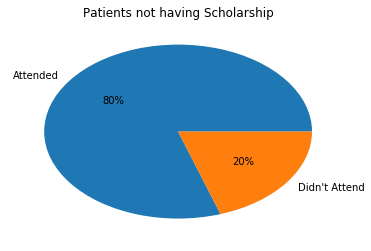

In [29]:
plot_pie(df_non_schol , "Patients not having Scholarship")

Then having a scholarship decreases the probability of showing up by a small range.

### Research Question 4: Does being handcapped affect the patient decision to attend the appointment?

In [122]:
df.shape

(106987, 14)

In [30]:
df['handcap'].unique()

array([0, 1, 2, 3, 4])

In [31]:
df['handcap'].value_counts()

0    104747
1      2041
2       183
3        13
4         3
Name: handcap, dtype: int64

In [32]:
#convert the values to handcapped (1) and non handcapped(0) for better analysis

df['handcap'] =df['handcap'].map({0:0, 1:1, 2:1, 3:1, 4:1})

In [33]:
df['handcap'].unique()

array([0, 1])

In [34]:
df.head(3)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1


In [35]:
show_hand = df.groupby('handcap').show.sum()
show_hand

handcap
0    83474
1     1833
Name: show, dtype: int64

In [36]:
Total_num= df.groupby('handcap').patientid.count()
Total_num

handcap
0    104747
1      2240
Name: patientid, dtype: int64

In [37]:
prop_hand = show_hand[1]/(Total_num[1]) *100
prop_non_hand   = show_hand[0]/(Total_num[0]) *100

prop_hand , prop_non_hand

(81.83035714285715, 79.69106513790372)

It seems there is more showing up rates with the handcapped patients , they can be more concerned about their health.


## Research Question 5: Does day of appointment affects showing up ?

In [38]:
df.head(5)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1


In [39]:
df_show= df[df['show'] ==1 ]
df_show.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1


In [40]:
df_non_show= df[df['show'] ==0 ]
df_non_show.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show
6,733688164476661,5630279,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,0
7,3449833394123,5630575,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,0
11,7542951368435,5620163,M,2016-04-26,2016-04-29,29,NOVA PALESTINA,0,0,0,0,0,1,0
17,14794966191172,5633460,F,2016-04-28,2016-04-29,40,CONQUISTA,1,0,0,0,0,0,0
20,622257462899397,5626083,F,2016-04-27,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,0


In [41]:
df_non_show['appointmentday'].dt.dayofweek.value_counts()

1    5024
2    4948
0    4515
4    3940
3    3244
5       9
Name: appointmentday, dtype: int64

In [43]:
day_bins= sorted(df_non_show['appointmentday'].dt.dayofweek.unique())
day_bins

[0, 1, 2, 3, 4, 5]

In [45]:
def plot_hist(df_name , title):
    day_bins= sorted(df_name['appointmentday'].dt.dayofweek.unique())
    plt.hist(df_name['appointmentday'].dt.dayofweek, bins=day_bins, alpha=0.7, width=0.6 );
    plt.xlabel("day")
    plt.ylabel("number of patients")
    plt.xticks(day_bins)
    plt.title(title);

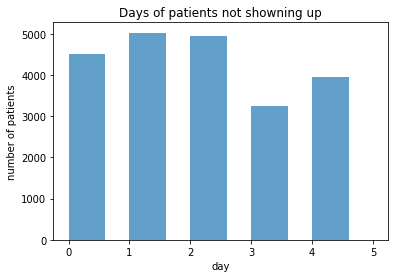

In [46]:
plot_hist(df_non_show ,"Days of patients not showning up" )

The peek days patients dont show up in their appointment on tuesday and wednesday.

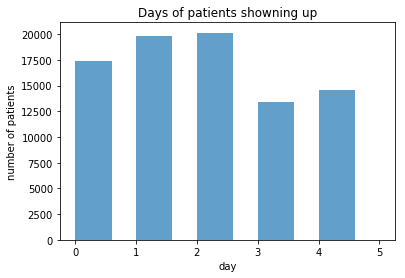

In [50]:
plot_hist(df_show ,"Days of patients showning up" )

The peek days patients show up in their appointment on tuesday and wednesday.
This means that the days of appointment is not strongly correlated with showing up.

<a id='conclusions'></a>
## Conclusions

* Gender doesn't play a role in showing up for the appointment.
* There is no strong correlation between the no show up and any other variable. On the other hand, there is positive    correlation between diabetes and hypertension.
* Having a scholarship decreases the probability of showing up by a small range.
* It seems there is more showing up rates with the handcapped patients , they can be more concerned about their health.
* The days of appointment is not strongly correlated with showing up.

### Limitations

* Appointment Time in all the rows is same that is 12 am so we couldn't analyze on hour.
* Handcap column consists of five different values(0,1,2,3,4) with no clear explanation so I had to convert it to boolean 0 and 1 only .
* SMS received was not explained clearly.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [51]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0